# Lab | Imbalanced data

Building a churn predictor

## Load the dataset and explore the variables.

In [1]:
# bringing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# searching for the file to import
cd ..

/Users/ymrteran/Documents/GitHub/Ironhack Labs/DataLabs


In [3]:
cd ..

/Users/ymrteran/Documents/GitHub/Ironhack Labs


In [6]:
# importing the file
data = pd.read_csv('Extras/Material/customer_churn.csv')

In [7]:
# getting basic info from the file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# checking some values to look for possible inconsistencies, since there are no nulls
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [11]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [14]:
data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [15]:
data['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [16]:
data['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [17]:
data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [18]:
data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [19]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [20]:
data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [25]:
data['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [24]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [26]:
data['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [27]:
data['Churn'].value_counts()
# imbalanced dataset - high difference between the 2 classes -
# risk of amplification of the majority class - model will struggle to identify the "yes" churns -
# possible solution: 
# applying sampling techniques - addressing imbalance, try with over or undersampling

No     5174
Yes    1869
Name: Churn, dtype: int64

In [33]:
# check correlation for numerical columns
data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [34]:
corr_matrix = data.corr()

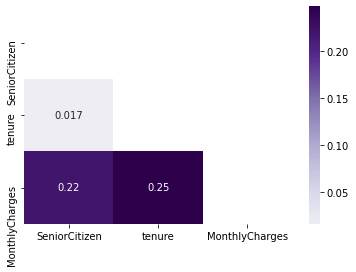

In [63]:
# using a mask to visualize the values only once
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix,
           annot = True,
           center = 0,
           mask = mask,
           cmap = 'PuOr')
plt.show();

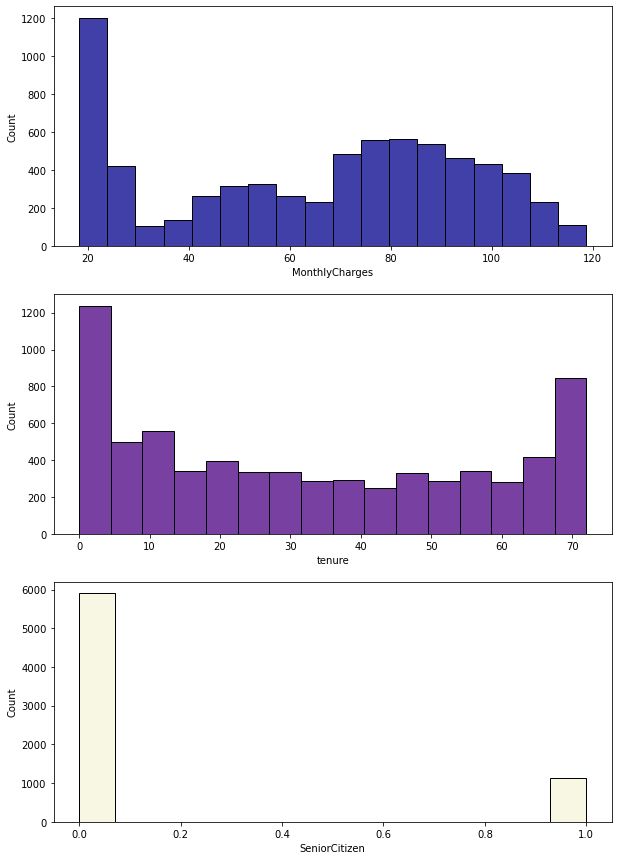

In [73]:
# plotting the columns
fig, ax = plt.subplots(3, 1, figsize=(10,15))
sns.histplot(data = data, x = 'MonthlyCharges', color = 'darkblue', ax = ax[0])
sns.histplot(data = data, x = 'tenure', color = 'indigo', ax = ax[1])
sns.histplot(data = data, x = 'SeniorCitizen', color = 'beige', ax = ax[2]);

## Extract the target variable.

We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen, MonthlyCharges.

In [74]:
# variable to predict
y = data['Churn']

In [75]:
# independent variables : tenure, SeniorCitizen and MonthlyCharges, all numerical
X = data.select_dtypes(include = np.number)

## Extract the independent variables and scale them.

In [77]:
# bringing the packages
import numpy as np
from sklearn.preprocessing import Normalizer

In [78]:
transformer = Normalizer()
transformer.fit(X)
X_normalized = transformer.transform(X)

In [79]:
# setting dataframe
X = pd.DataFrame(X_normalized, columns=X.columns)

In [80]:
# checking it
X

,SeniorCitizen,tenure,MonthlyCharges
0,0.00000,0.033482,0.999439
1,0.00000,0.512610,0.858622
2,0.00000,0.037115,0.999311
3,0.00000,0.728628,0.684910
4,0.00000,0.028277,0.999600
...,...,...,...
7038,0.00000,0.272322,0.962206
7039,0.00000,0.572182,0.820127
7040,0.00000,0.348346,0.937366
7041,0.01342,0.053681,0.998468


In [88]:
# establishing the categorical data to use
categorical = pd.DataFrame(data['Churn'])

In [89]:
# turning it into numbers
categorical = pd.get_dummies(y, columns =['Churn'])

In [90]:
categorical

,No,Yes
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
7038,1,0
7039,1,0
7040,1,0
7041,0,1


In [ ]:
# re-establishing y for the numerical column
y = categorical['No']

## Build the logistic regression model.

In [91]:
# bringing the packages
from sklearn.linear_model import LogisticRegression # model
from sklearn.model_selection import train_test_split # train test
from sklearn.metrics import confusion_matrix, plot_confusion_matrix # evaluation
from sklearn.metrics import classification_report # evaluation
from sklearn.metrics import accuracy_score # evaluation

In [95]:
# defining model
lr = LogisticRegression(max_iter = 400)

In [96]:
# seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [97]:
# fit the model to our training data set
lr.fit(X_train, y_train)

LogisticRegression(max_iter=400)

## Evaluate the model.

In [98]:
y_pred = lr.predict(X_test)
# for our testing data set make some predictions of y (using the trained model)

In [99]:
accuracy_score(y_test, y_pred)
# comparing each actual y yo reach predicted y for the test data set

0.7534311405584477

In [100]:
# confusion matrix of the same y_test, y_pred
confusion_matrix(y_test, y_pred)

array([[1332,  221],
       [ 300,  260]])

In [103]:
cnf_mx = confusion_matrix(y_test, y_pred)

In [105]:
# setting up a dataframe for the confusion matrix
dataconf = pd.DataFrame(cnf_mx, columns = np.unique(y_test), index = np.unique(y_test)) # setting the labels
dataconf

,No,Yes
No,1332,221
Yes,300,260


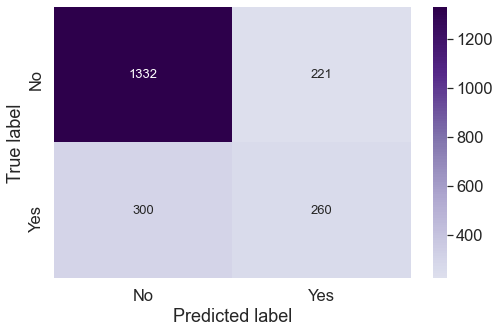

In [111]:
# setting axis's names
dataconf.index.name = 'True label'
dataconf.columns.name = 'Predicted label'
# fontsize
sns.set(font_scale = 1.5)
# plot size
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(dataconf, annot = True, fmt = '', cmap = 'PuOr', center = 0, annot_kws = {'size':13});

## Even a simple model will give us more than 70% accuracy. Why?

- We had a highly imabalanced dataset (high difference between the Yes and No in the Churn column) which by default will give you a high accuracy percentage but only for one of the outcomes

## Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. 

In [112]:
# getting the package
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [113]:
# bringing back the train test split for the technique
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [114]:
# checking the values
y_train.value_counts()

No     3621
Yes    1309
Name: Churn, dtype: int64

In [115]:
y_train_sm.value_counts()

No     3621
Yes    3621
Name: Churn, dtype: int64

In [116]:
# fit to train- smote
lr.fit(X_train_sm, y_train_sm)
# REMEMBER we only applied smote to the train, no the test data

LogisticRegression(max_iter=400)

In [117]:
# keeping consistent denominations / creating new predictions
y_pred_sm = lr.predict(X_test)

In [118]:
# accuracy using smote on train
accuracy_score(y_test, y_pred_sm)

0.6881211547562707

In [119]:
# confusion matrix using smote on train
confusion_matrix(y_test, y_pred_sm)

array([[1041,  512],
       [ 147,  413]])

In [120]:
cnf_smote = confusion_matrix(y_test, y_pred_sm)

In [121]:
# setting up a dataframe for the confusion matrix
datasmote = pd.DataFrame(cnf_smote, columns = np.unique(y_test), index = np.unique(y_test)) # setting the labels
datasmote

,No,Yes
No,1041,512
Yes,147,413


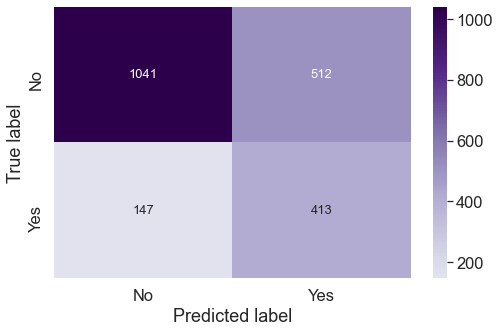

In [122]:
# setting axis's names
datasmote.index.name = 'True label'
datasmote.columns.name = 'Predicted label'
# fontsize
sns.set(font_scale = 1.5)
# plot size
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(datasmote, annot = True, fmt = '', cmap = 'PuOr', center = 0, annot_kws = {'size':13});

- The true "Yes" churns have improved but overall the model is less accurate

## Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. 

In [123]:
# getting the package
from imblearn.under_sampling import TomekLinks
tomek = TomekLinks (sampling_strategy = 'majority')

In [124]:
# applying tomek to train
X_train_tk, y_train_tk = tomek.fit_resample(X_train, y_train)

In [125]:
lr.fit(X_train_tk, y_train_tk)

LogisticRegression(max_iter=400)

In [126]:
y_pred_tk = lr.predict(X_test)

In [127]:
accuracy_score(y_test, y_pred_tk)

0.747278750591576

In [128]:
# confusion matrix using tomelink on train
confusion_matrix(y_test, y_pred_tk)

array([[1283,  270],
       [ 264,  296]])

In [129]:
cnf_tomek = confusion_matrix(y_test, y_pred_tk)

In [130]:
# setting up a dataframe for the confusion matrix
datatomek = pd.DataFrame(cnf_tomek, columns = np.unique(y_test), index = np.unique(y_test)) # setting the labels
datatomek

,No,Yes
No,1283,270
Yes,264,296


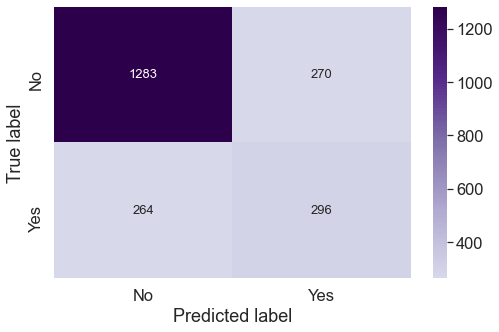

In [131]:
# setting axis's names
datatomek.index.name = 'True label'
datatomek.columns.name = 'Predicted label'
# fontsize
sns.set(font_scale = 1.5)
# plot size
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(datatomek, annot = True, fmt = '', cmap = 'PuOr', center = 0, annot_kws = {'size':13});

- No improvement at all :(